# IRkernelのインストール方法

IRkernelのサイトの[「Installation」](https://irkernel.github.io/installation/)で正常にインストールできれば問題ありません。

私は、WinPythonを使い、かつ、プロキシーを通じてインストールを試みました。うまくいきませんでした。

以下に私が行った手順を書きます。ちなみに私の使用しているWinPythonとRは、以下の通りです。

* WinPython-64bit-3.5.3.1Qt5
* R-3.4.1

環境によっては以下の手順でもうまくいかない場合もあるようです。その際は、ご容赦ください。

### 1/3) ライブラリのインストール  

Rを管理者権限で起動してください。  
IRkernelのサイトにあるように以下を実行すれば、問題ありませんでした。  
ただし、途中に「CRAN のミラーサイト」の選択ダイアログが表示されます。

----

```
install.packages(c('repr', 'IRdisplay', 'evaluate', 'crayon', 'pbdZMQ', 'devtools', 'uuid', 'digest'))
```

----

### 2/3) IRkernelのインストール

原因は不明ですが、サイトにある

----

```
devtools::install_github('IRkernel/IRkernel')
```

----

ではうまくいきませんでした。ソースからインストールしました。

* [こちら](https://github.com/IRkernel/IRkernel/releases)から、所望の「`*.tar.gz`」をダウンロードしてください
* 所望のフォルダにコピーしてください（本例では、c:\tmp）
* 以下のコマンドをR上で実行してください

----

```
install.packages("c:/tmp/IRkernel-0.7.tar.gz", repos = NULL, type = "source")
```

----

### 3/3) jupyterがRを認識するようにする

サイトにある 

----

```
IRkernel::installspec()
```

----

としても、WinPythonではうまくいきません。

上記コマンドは、「`WinPythonのフォルダ\python-3.5.3.amd64\Scripts`」にある「`jupyter.exe`」や「`ipyton.exe`」などを利用するようですが、コマンドプロンプトで直接実行しても以下のようなエラーが表示されます。

----

```
Fatal error in launcher: Unable to create process using '"'
```

----

batファイルから起動するようにすればうまくいくようです。以下の3つのbatファイルを作ってください。（リンク先からダウンロードも可能です）

「[jupyter.bat](jupyter.bat)」

----

```
@echo off
call "%~dp0env_for_icons.bat"
cd/D "%WINPYWORKDIR%"
"%WINPYDIR%\scripts\jupyter.exe" %*
```

----

「[ipython.bat](ipython.bat)」

----

```
@echo off
call "%~dp0env_for_icons.bat"
cd/D "%WINPYWORKDIR%"
"%WINPYDIR%\scripts\ipython.exe" %*
```

----

「[ipython3.bat](ipython3.bat)」

----

```
@echo off
call "%~dp0env_for_icons.bat"
cd/D "%WINPYWORKDIR%"
"%WINPYDIR%\scripts\ipython3.exe" %*
```

----

この3つのファイルを、「WinPythonのフォルダ\scripts」にコピーしてください。「WinPythonのフォルダ\python-3.5.3.amd64\Scripts」ではありませんので注意してください。

そして、「WinPythonのフォルダ\scripts」のパスを通してください。（重要！）

最後に以下の手順を行ってください。

* 「cmd.exe（コマンド プロンプト）」を管理者権限で起動してください
* 「Rのbinフォルダ\R.exe」を実行して、***コマンド プロンプト上***でRを起動してください
* 以下を実行してください

----

```
IRkernel::installspec()

```

----

正常動作すれば、以下のように表示されます。

----

```
[InstallKernelSpec] Installed kernelspec ir in C:\WinPython3\settings...(省略)

```

----

Notebookを再起動すると、新規にRでファイルを作成することが可能になります

![menu_new_R.jpg](menu_new_R.jpg)


# 試してみます

このページ自体を、Notebookで作成しているので、実際にコードを実行することが可能です。（書いていて不思議な感じですが）

In [1]:
x = rnorm(100)
head(x)

[1] -0.5349826 -0.9154159 -1.7867710 -0.1369557  0.8975631 -1.6127081

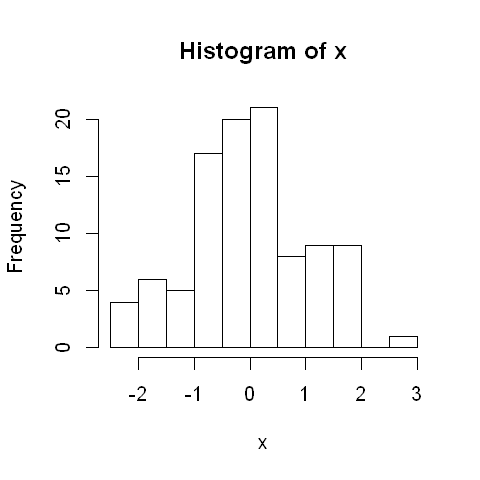

In [2]:
options(repr.plot.width=4, repr.plot.height=4) # グラフの大きさを調整します
hist(x)

----
※  
本ipynbファイルをIRkernelをインストールする前に開くと以下のようなダイアログが表示されます。  
![kernel_not_found.jpg](kernel_not_found.jpg)  
「Continue Without Kernel」を押し、「試してみます」まで実行してみてください。  
IRkernelインストール後、Notebookを再起動すれば上のダイアログは表示されなくなります。

----
[ホームへ](https://waku-take-a.github.io/index.html)  
[↑Rの記事Topへ](https://waku-take-a.github.io/R.html)  

※  
上記のipynbファイル等は、[こちらに](https://github.com/WAKU-TAKE-A/RTips)あります。  
解凍後、`The jupyter notebook`にアップロードすれば、ローカルな環境で実行することも、編集することもできます。

<(_ _)>

★★★responsive_ja★★★